Done by Wong Wen Bing, 230436M

# **Part 1: Data Preparation and Understanding** 

In [2]:
pip install pandas seaborn nltk matplotlib openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
# nltk.download('all')

In [5]:
data=pd.read_excel('Data.xlsx')
data

,description,species
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,Click here for more information about the Red ...,Collared Kingfisher
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,521 foreground recordings and 156 background ...,Little Egret
...,...,...
737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole
739,Larger than a Cattle Egret and with black leg...,Little Egret
740,22 Oct 2023 ï¿½ Dragon Snake (Javan Tubercle S...,Javan Myna


In [6]:
data.isna().sum()

description    24
species         0
dtype: int64

In [7]:
dup=data.duplicated().value_counts()
print(f'''
true: {dup[True]}
false: {dup[False]}
''')


true: 128
false: 614



In [8]:
#drop null and duplicate values
data=data.dropna()
data=data.drop_duplicates()
data.info()
data=data.reset_index()
data

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 739
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  611 non-null    object
 1   species      611 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


,index,description,species
0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,1,Click here for more information about the Red ...,Collared Kingfisher
2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,4,521 foreground recordings and 156 background ...,Little Egret
...,...,...,...
606,735,Black-naped Oriole (Oriolus chinensis). The bl...,Black-naped Oriole
607,736,"Feb 15, 2023 Â· Sacred kingfisher. Todiramphu...",Collared Kingfisher
608,737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
609,738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole


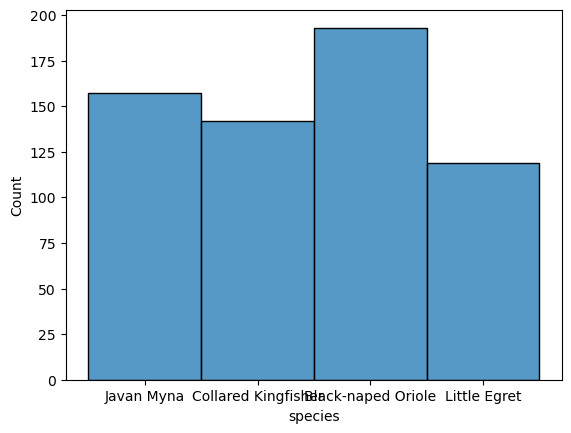

In [9]:
group=data.groupby(['species']).count().reset_index()
sns.histplot(data['species'])
plt.show()

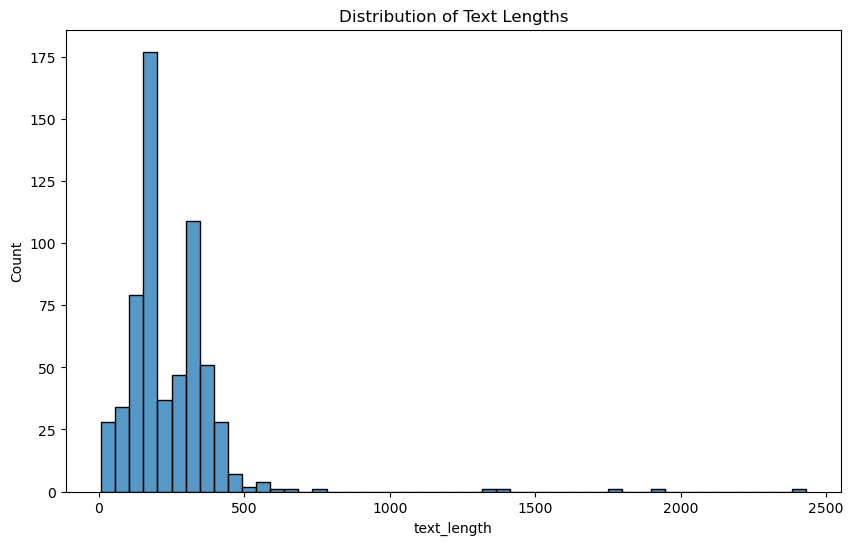

In [10]:
data['text_length'] = data['description'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

In [84]:
def preprocess_text(text):
    stopwordss=list(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    # text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    # text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s\s+','', text)
    # print(tokens)
    # for word in tokens: 
    #     if word not in stopwordss: 
    #         wordss.append(word)
    # tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    # print(tokens)
    # wordss.append(tokens)
    # print(wordss)
    return text
data['cleaned_text']=''
data.head()

,index,description,species,text_length,cleaned_text
0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,
1,1,Click here for more information about the Red ...,Collared Kingfisher,398,
2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,
3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,
4,4,521 foreground recordings and 156 background ...,Little Egret,112,


In [85]:
# Apply preprocessing
data['cleaned_text'] = data['description'].apply(preprocess_text)
data.head()

,index,description,species,text_length,cleaned_text
0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,junthe javan myna shares some similarities wi...
1,1,Click here for more information about the Red ...,Collared Kingfisher,398,click here for more information about the red ...
2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,the blackheaded orioleoriolus larvatus is a sp...
3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search from thousands of royaltyfree javan myn...
4,4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recordings andbackground recordings...


In [86]:
data.to_csv('230436M_cleaned_data.csv')

Feature Engineering

In [87]:
X = data['cleaned_text']
Y= data['species']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_train

432    julrufouscollared kingfisher the rufouscollare...
142    understanding the genetic basis of convergence...
572     the hong kong bird watching society hkbws had...
198    aprcollared kingfisher todirhamphus chloris mo...
167     contents introductionlittle owlfrankfurt germ...
                             ...                        
74     a large coastal kingfisher with a gleaming whi...
306    the giant kingfisher trail follows a jungly ri...
215    the collared kingfisher feeds mainly on insect...
58     altamira oriole audubons oriole robert mcquade...
566    the khor kalba conservation reserve managed by...
Name: cleaned_text, Length: 427, dtype: object

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}

features: {cv.get_feature_names_out()}
      """)


training: (427, 3192)
test: (184, 3192)

features: ['abilities' 'ability' 'able' ... 'zebra' 'zimbabwe' 'zoonoses']
      


In [90]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs')

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict(X_test_cv)
y_pred_cv

array(['Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Collared Kingfisher', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Collared Kingfisher', 'Javan Myna', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Black-naped Oriole',
       'Little Egret', 'Black-naped Oriole', 'Little Egret',
       'Collared Kingfisher', 'Black-naped Oriole', 'Black-naped Oriole',
       'Collared Kingfisher', 'Little Egret', 'Black-naped Oriole',
       'Black-naped Oriole', 'Black-naped Oriole', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Collared Kingfisher',
       'Black-naped Oriole', 'Little Egret', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Collared Kingfisher',
       'Javan Myna', 'Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Javan Myna', 'Black-naped Oriole', 'Javan Myna',
       'Black-naped 

In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[57,  1,  0,  0],
       [ 5, 38,  0,  0],
       [ 3,  0, 44,  0],
       [ 7,  0,  2, 27]])

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.79      0.98      0.88        58
Collared Kingfisher       0.97      0.88      0.93        43
         Javan Myna       0.96      0.94      0.95        47
       Little Egret       1.00      0.75      0.86        36

           accuracy                           0.90       184
          macro avg       0.93      0.89      0.90       184
       weighted avg       0.92      0.90      0.90       184



In [93]:
#MAIN DIFFERENCE IN CODE
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

#train
nb.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=nb.predict(X_test_cv)
# y_pred_cv

In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[57,  1,  0,  0],
       [ 5, 38,  0,  0],
       [ 2,  1, 44,  0],
       [ 9,  0,  3, 24]])

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.78      0.98      0.87        58
Collared Kingfisher       0.95      0.88      0.92        43
         Javan Myna       0.94      0.94      0.94        47
       Little Egret       1.00      0.67      0.80        36

           accuracy                           0.89       184
          macro avg       0.92      0.87      0.88       184
       weighted avg       0.90      0.89      0.88       184



In [96]:
#MAIN DIFFERENCE IN CODE
from sklearn import svm

supportvector=svm.LinearSVC()
#train
supportvector.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=supportvector.predict(X_test_cv)
# y_pred_cv

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[55,  1,  1,  1],
       [ 3, 39,  0,  1],
       [ 0,  1, 46,  0],
       [ 6,  0,  3, 27]])

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.86      0.95      0.90        58
Collared Kingfisher       0.95      0.91      0.93        43
         Javan Myna       0.92      0.98      0.95        47
       Little Egret       0.93      0.75      0.83        36

           accuracy                           0.91       184
          macro avg       0.92      0.90      0.90       184
       weighted avg       0.91      0.91      0.91       184



In [59]:
testset=pd.read_excel('Data_test.xlsx')
testset.head()

,description,species
0,Looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole
4,NaN,Javan Myna


In [60]:
testset.drop_duplicates(inplace=True)
testset.dropna(inplace=True)
testset['cleaned_text'] = testset['description'].apply(preprocess_text)
testset.head()

,description,species,cleaned_text
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking for fun and interesting facts about a ...
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed during feeding such as wal...
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,blacknaped oriole explore more topics name des...
5,"The Javan myna, also known as the white-vented...",Javan Myna,the javan myna also known as the whitevented m...


In [61]:
test=testset['cleaned_text'].to_list()
print(test)
vector=cv.transform(test)
testset['log_reg_pred']=(lr.predict(vector))[0]

['looking for fun and interesting facts about a blacknaped oriole learn about this amazing bird and discover other animals from tiny insects to giant mammals', 'giant panda grey wolf canis lupus proboscis monkey western gorilla gorilla gorilla scarlet macaw ara macao basic facts about blackhooded oriole lifespan distribution and habitat map lifestyle and social behavior mating habits diet and nutrition population size and status ', 'javanicus displayed during feeding such as walking jumping hopping gleaning running short flying voicing looking around and feather fluffing a', 'blacknaped oriole explore more topics name description  description male overall bright yellow plumage with nape and wing tips black female like male but  ', 'the javan myna also known as the whitevented myna is a species of myna it is a member of the starling family it is native to bali and java it has been introduced to other asian countries and as far away as puerto rico', 'dont worry its not a typo error it is

In [62]:
testset.head()

,description,species,cleaned_text,log_reg_pred
0,Looking for fun and interesting facts about a ...,Black-naped Oriole,looking for fun and interesting facts about a ...,Black-naped Oriole
1,Giant Panda. Grey Wolf. Canis lupus. Proboscis...,Black-naped Oriole,giant panda grey wolf canis lupus proboscis mo...,Black-naped Oriole
2,javanicus displayed during feeding such as wal...,Javan Myna,javanicus displayed during feeding such as wal...,Black-naped Oriole
3,Black-naped Oriole: Explore more topics. Name;...,Black-naped Oriole,blacknaped oriole explore more topics name des...,Black-naped Oriole
5,"The Javan myna, also known as the white-vented...",Javan Myna,the javan myna also known as the whitevented m...,Black-naped Oriole


In [63]:
testset['naive_bayes_pred']=(nb.predict(vector))[0]

In [64]:
testset.to_excel('Tested_set.xlsx')